## Tutorial for using LSS Mapper on real astronomical data

In this notebook, I will demonstrate how to use a real dataset of galaxies in the nearby Universe, taken from the Sloan Digital Sky Survey (SDSS), to generate the Voronoi Tessellation diagram and the Minimum Spanning Tree. Furthermore, I will show how we can leverage the two techniques to map the Large Scale Structure (LSS) traced by galaxies.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from _VT import VT
from _MST import MST
from plot_both_cumul_dist import plot_both_cumul_dist

%matplotlib inline

## Read in the csv file with galaxies in the local Universe

In [3]:
df = pd.read_csv('data/df1.csv')

## Initialize Voronoi Tessellation, and get cell densities

In [4]:
V = VT(df)
vor = V.get_vt(df)
V.celldensity = V.get_celldens(vor)

### Plot the Voronoi diagram

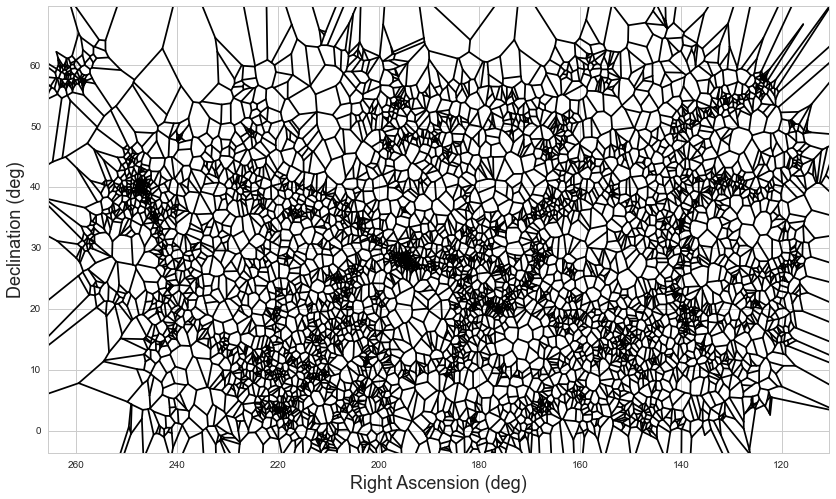

In [5]:
V.plot_voronoi(vor, xlim=(vor.max_bound[0], vor.min_bound[0]), 
               ylim=(vor.min_bound[1], vor.max_bound[1]))

## Initialize the Minimum Spanning Tree - here I've selected a few parameters which are pretty good at selecting clusters and groups in this data set

In [5]:
mst_clust = MST(df, 0.5, 6, 250)

## Plot histograms and cumulative distributions of the VT cell densities and the MST branch lengths

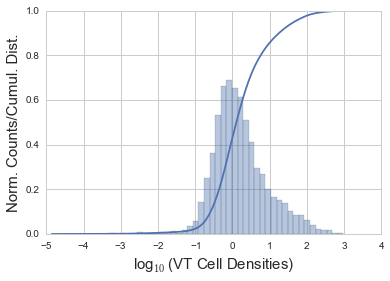

In [6]:
V.plot_vt_cumul(V)

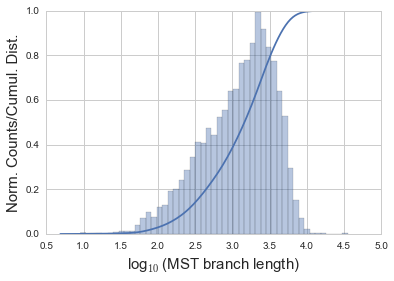

In [7]:
mst_clust.plot_mst_cumul()

Compare cumulative distribution of VT cells to MST branch lengths

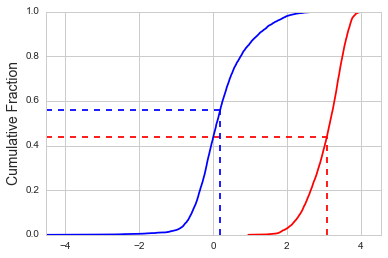

In [8]:
plot_both_cumul_dist(np.asarray(V.celldensity), 
                     mst_clust.seps, dens_thresh=[0.2])

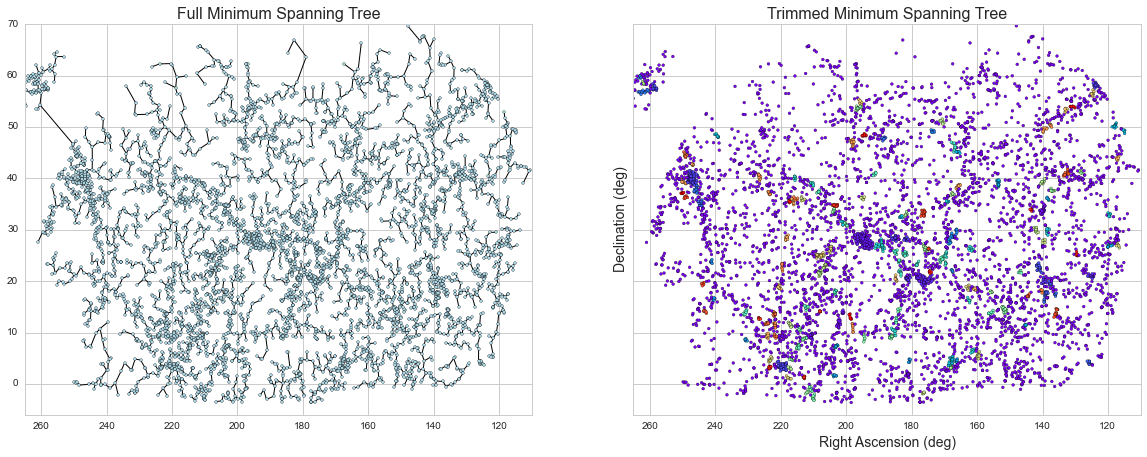

In [31]:
mst_clust.plot_mst(mst_clust.set_mst, xlim=(265, 110), ylim=(-6, 70))